# Battlefly Simulator scratch work


In [86]:
import numpy as np
from enum import Enum, auto
import time
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import random
import importlib
# importlib.reload(module)

In [87]:
import bf_factory

In [108]:
bfs = bf_factory.generate_random_bfs(200)

In [109]:
bfs[0].get_name()

'how1_las1_nx1_reg1_0'

In [110]:
# list(map(lambda x: x.get_name(), bfs))

In [111]:
import arena
importlib.reload(arena)

<module 'arena' from '/Users/SunnyNie/Documents/Programming/games/battlefly/arena.py'>

In [112]:
# arena.bfs = bfs

In [113]:
arena.run_battles(bfs, batch=10, num_threads=10)

Press enter to stop battles 


In [114]:
sum(list(map(lambda x: x.battles, bfs)))

280800

In [115]:
bfs[0].battles

1610

In [116]:
bfs_list = []
for bf in bfs:
    bfs_list.append({"name":bf.get_name(), "wins":bf.wins, "battles":bf.battles})

In [117]:
df = pd.DataFrame(bfs_list)
df["rate"] = df["wins"]/df["battles"]
df.sort_values(by="rate", ascending=False, inplace=True)

In [118]:
df

,name,wins,battles,rate
75,how1_how1_pla1_cryo1_0,1506,1520,0.990789
146,how1_how1_cer1_auto1_0,1306,1330,0.981955
26,how1_how1_cer1_over1_0,1163,1200,0.969167
157,how1_how1_nx1_auto1_0,1381,1430,0.965734
72,auto1_how1_nx1_cryo1_0,1250,1310,0.954198
...,...,...,...,...
196,las1_las1_pla1_auto1_0,98,1590,0.061635
57,las1_las1_pla1_over1_0,76,1240,0.061290
32,las1_las1_warp1_reg1_0,86,1430,0.060140
199,hunt1_hunt1_pla1_reg1_0,89,1480,0.060135


In [2]:
from battlefly import Battlefly

In [5]:
from mods import get_weapon, get_utility, get_defense

In [7]:
import mods

In [10]:
list(mods.get_weapons_list())

['proton_blaster',
 'hunter_missiles',
 'mining_laser',
 'autocannon',
 'micro_rocket_pods',
 'howitzer']

In [ ]:
random.randint(

In [12]:
bf1 = Battlefly(get_weapon("autocannon", 1), 
                get_weapon("autocannon", 1), 
                get_defense("ceramo_armor", 1),
                get_utility("regenerative_nanobot", 1))
bf2 = Battlefly(get_weapon("howitzer", 1), 
                get_weapon("micro_rocket_pods", 1), 
                get_defense("boosters_thrusters", 1),
                get_utility("auto_reloaders", 1))

In [13]:
import arena

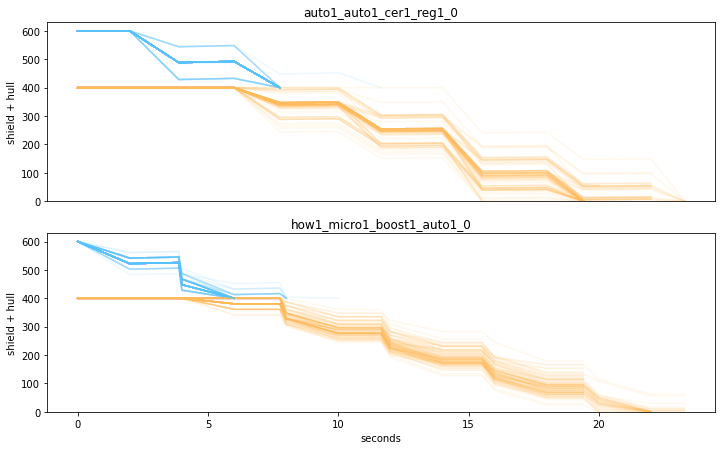

In [14]:
arena.generate_report(bf1, bf2, 100, "res", False)

In [8]:
import parser
importlib.reload(arena)

<module 'arena' from '/Users/SunnyNie/Documents/Programming/games/battlefly/arena.py'>

In [6]:
def fight_battleflies(bf1, bf2, detailed=False):
    status={"shield1":[bf1.shield], 
            "hull1":[bf1.hull], 
            "shield2":[bf2.shield], 
            "hull2":[bf2.hull], 
            "time":[0]}
    about = {"bf1":bf1.get_name(), "bf2":bf2.get_name()}
    bf1.aim_at_enemy(bf2)
    bf2.aim_at_enemy(bf1)
    while bf1.hull>0 and bf2.hull>0:
        
        # print(bf1.reloading_for())
        # print(bf2.reloading_for())
        wait = min(bf1.reloading_for(), bf2.reloading_for())
        # print(f"waiting for {wait/1e3}s")
        bf1.fast_forward_utilities(wait)
        bf2.fast_forward_utilities(wait)
        bf1.fast_forward_weapons(wait)
        bf2.fast_forward_weapons(wait)
        if detailed:
            status["shield1"].append(bf1.shield)
            status["hull1"].append(bf1.hull)
            status["shield2"].append(bf2.shield)
            status["hull2"].append(bf2.hull)
            status["time"].append(status["time"][-1]+wait)
        # print(f"{status['time'][-1]/1e3} ====== new round =======")

    if bf1.hull > 0:
        bf1.won_battle()
        bf2.lost_battle()
    else:
        bf2.won_battle()
        bf1.lost_battle()
    bf1.reset_stats()
    bf2.reset_stats()
    if detailed: return status, about

In [7]:
a = {"a":1, "b":2}
a.keys()

dict_keys(['a', 'b'])

In [47]:
def multiple_fights(bf1, bf2, num):
    report = []
    for _ in range(num):
        s, a = fight_battleflies(bf1, bf2, True)
        report.append(s)
    return report, a

In [120]:
s, a = multiple_fights(bf1, bf2, 200)

In [93]:
bf2.wins

595

In [86]:
bf1.w1.enemy

In [87]:
# s, a = fight_battleflies(bf1, bf2, True)

In [99]:
def turn_report_into_df(s):
    df = pd.DataFrame(s)
    # df.drop(["time"], axis=1)
    df = df/1e3
    df = df.set_index(["time"])

    df[df < 0] = None
    df = df.fillna(value=0, limit=1)
    df.shield1 += df.hull1.iloc[0]
    df.shield2 += df.hull2.iloc[0]
    return df

In [121]:
dfs = list(map(lambda x: turn_report_into_df(x), s))

In [106]:
import math

In [114]:
dfs[0].hull1.iloc[-1]

0.0

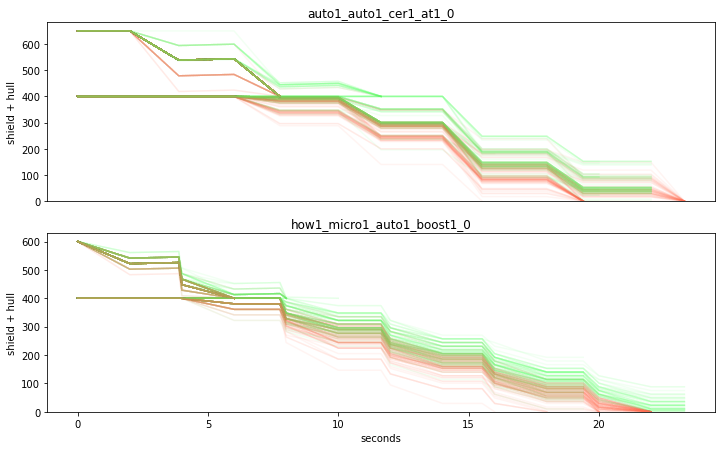

In [123]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
fig.tight_layout()

ax[0].set_title(a["bf1"])
ax[0].set_ylabel("shield + hull")
# ax[0].scatter(df.index, df.shield1)
# ax[0].scatter(df.index, df.hull1)
for df in dfs:
    # ax[0].plot(df.shield1, c="#54c3ff", alpha=1/(len(dfs)**0.5))
    # ax[0].plot(df.hull1, c="#ffbb54", alpha=1/(len(dfs)**0.5))
    
    ax[0].plot(df.shield1, c="#ff7154" if df.hull1.iloc[-1]==0 else "#54ff62", alpha=1/(len(dfs)**0.5))
    ax[0].plot(df.hull1, c="#ff7154" if df.hull1.iloc[-1]==0 else "#54ff62", alpha=1/(len(dfs)**0.5))
    
    
ax[0].axes.get_xaxis().set_visible(False)

ax[1].set_title(a["bf2"])
ax[1].set_ylabel("shield + hull")
for df in dfs:
    # ax[1].plot(df.shield2, c="#54c3ff", alpha=1/(len(dfs)**0.5))
    # ax[1].plot(df.hull2, c="#ffbb54", alpha=1/(len(dfs)**0.5))
    
    ax[1].plot(df.shield2, c="#54ff62" if df.hull1.iloc[-1]==0 else "#ff7154", alpha=1/(len(dfs)**0.5))
    ax[1].plot(df.hull2, c="#54ff62" if df.hull1.iloc[-1]==0 else "#ff7154", alpha=1/(len(dfs)**0.5))
ax[1].set_xlabel("seconds")



ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)

fig.savefig('res.png')

In [45]:
a1 = pd.DataFrame([9,8,7], index=[1,2,3])
a2 = pd.DataFrame([1,2,3], index=[1,2,3])
a3 = pd.DataFrame([5,5,5], index=[1,2,3])
d = [a1, a3]

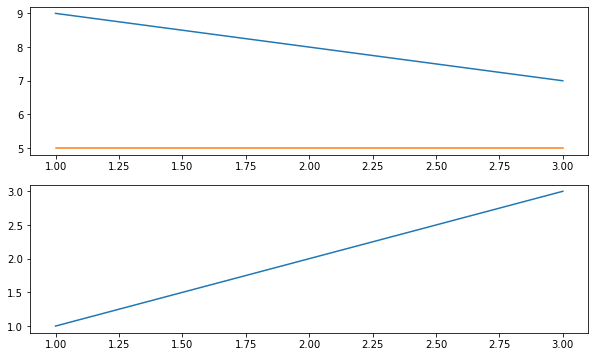

In [46]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
for i in d:
    ax[0].plot(i)
ax[1].plot(a2)

In [57]:
bf2.w1.reload

97

In [15]:
df = pd.DataFrame(s)
# df.drop(["time"], axis=1)
df = df/1e3
df = df.set_index(["time"])

df[df < 0] = None
df = df.fillna(value=0, limit=1)
df.shield1 += df.hull1[0]
df.shield2 += df.hull2[0]

In [16]:
bf1.shield

250000.0

In [17]:
df

,shield1,hull1,shield2,hull2
time,,,,
0.000,650.0000,400.0,600.000,400.0
0.720,650.0000,400.0,522.000,400.0
2.720,650.0000,400.0,448.000,400.0
3.763,538.4020,400.0,450.086,400.0
4.720,540.7945,400.0,400.000,380.5
6.720,545.7945,400.0,NaN,302.5
7.526,451.8095,400.0,NaN,302.5
7.527,400.0000,396.5,NaN,302.5
8.720,NaN,396.5,NaN,263.5


(0.0, 630.0)

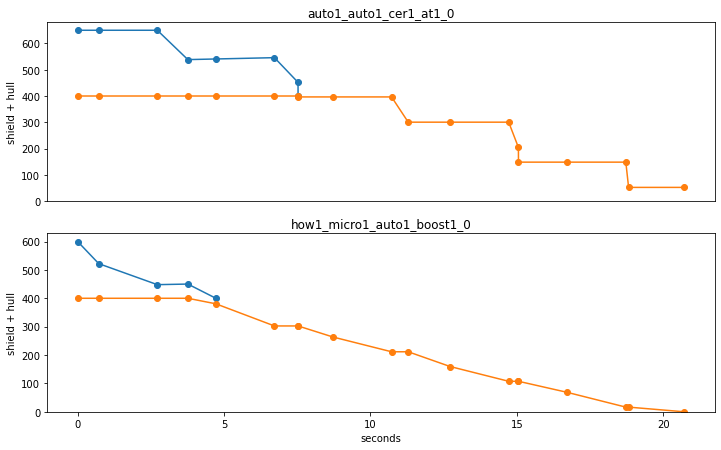

In [18]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
fig.tight_layout()

ax[0].set_title(a["bf1"])
ax[0].set_ylabel("shield + hull")
ax[0].plot(df.shield1, '-o')
ax[0].plot(df.hull1, '-o')
ax[0].axes.get_xaxis().set_visible(False)

ax[1].set_title(a["bf2"])
ax[1].set_ylabel("shield + hull")
ax[1].plot(df.shield2, '-o')
ax[1].plot(df.hull2, '-o')
ax[1].set_xlabel("seconds")



ax[0].set_ylim(bottom=0)
ax[1].set_ylim(bottom=0)

In [35]:
df

,shield1,hull1,shield2,hull2
time,,,,
0.000,650.000,400.0,600.0,400.0
2.000,650.000,400.0,522.0,400.0
3.650,538.402,400.0,525.3,400.0
4.000,539.277,400.0,448.0,400.0
6.000,544.277,400.0,400.0,380.5
7.300,451.527,400.0,NaN,380.5
7.301,400.000,396.5,NaN,380.5
8.000,NaN,396.5,NaN,328.5
10.000,NaN,396.5,NaN,276.5


In [15]:
s

{'shield1': [250000.0,
  250000.0,
  4226000.0,
  4226000.0,
  11178000.0,
  59058000.0,
  59058000.0,
  65010000.0,
  65010000.0,
  65010000.0,
  69962000.0,
  101842000.0,
  101842000.0],
 'hull1': [400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000,
  400000],
 'shield2': [250000.0,
  161000,
  2402,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098,
  -17098],
 'hull2': [400000,
  400000,
  400000,
  380500,
  380500,
  221902,
  202402,
  202402,
  103603,
  64603,
  64603,
  64603,
  -93995],
 'time': [0,
  2000,
  4000,
  6000,
  7763,
  8000,
  10000,
  11526,
  12000,
  14000,
  15289,
  15527,
  16000]}

In [12]:
import parser as p
from battlefly import Battlefly, Weapon, Utility
from effects import WEAPON, UTILITY, TRAIT

In [ ]:
Weapon(